# **Hand Written Digit Prediction - Classification Analysis**

---



**Chris Collin J - Artificial Intelligence and Machine Learning Project - YBI**

# **Objective**

The objective of this machine learning project is to develop an accurate and efficient hand-written digit classification model that can effectively predict the digits present in images of handwritten digits. By employing advanced classification techniques, the project aims to achieve high classification accuracy and robustness, enabling the model to generalize well to unseen data. Through careful feature engineering, model selection, and hyperparameter tuning, the project seeks to explore the best-suited classification algorithms and create a production-ready solution for accurate digit prediction, with potential applications in digit recognition systems and optical character recognition (OCR) technology.

# **Data Source**

# **Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# **Import Data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

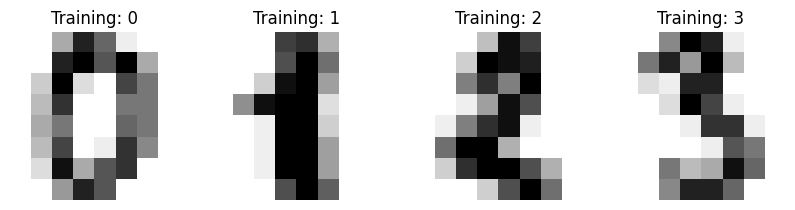

In [9]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

# **Data Preprocessing**

**Flatten Image**

In [10]:
df.images.shape

(1797, 8, 8)

In [11]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
df.images[0].shape

(8, 8)

In [13]:
len(df.images)

1797

In [14]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [15]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data[0].shape

(64,)

In [17]:
data.shape

(1797, 64)

# **Scaling Image Data**

In [18]:
data.min()

0.0

In [19]:
data.max()

16.0

In [20]:
data = data/16

In [21]:
data.min()

0.0

In [22]:
data.max()

1.0

In [23]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train Test Split Data**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier()

In [29]:
rf.fit(X_train, y_train)

RandomForestClassifier()

# **Predict Test Data**

In [30]:
y_pred = rf.predict(X_test)

In [31]:
y_pred

array([5, 6, 4, 1, 0, 6, 4, 0, 1, 1, 9, 2, 0, 1, 4, 2, 7, 9, 7, 7, 0, 9,
       9, 7, 4, 2, 3, 0, 0, 8, 3, 3, 9, 2, 0, 1, 4, 3, 2, 3, 8, 8, 8, 8,
       1, 4, 5, 6, 0, 7, 3, 9, 6, 4, 2, 9, 6, 3, 5, 3, 4, 8, 1, 2, 4, 3,
       5, 5, 3, 9, 0, 8, 1, 1, 7, 4, 9, 1, 4, 4, 9, 5, 6, 3, 6, 6, 7, 0,
       5, 7, 4, 0, 1, 8, 7, 3, 9, 8, 9, 0, 4, 9, 7, 7, 5, 8, 2, 9, 2, 2,
       3, 9, 7, 9, 1, 1, 7, 1, 8, 6, 5, 9, 8, 0, 7, 1, 4, 1, 1, 5, 0, 6,
       5, 4, 2, 5, 7, 1, 8, 8, 4, 5, 0, 9, 0, 8, 4, 1, 6, 6, 7, 1, 8, 3,
       8, 6, 4, 6, 2, 2, 7, 3, 7, 0, 6, 3, 5, 3, 1, 1, 7, 8, 1, 3, 6, 6,
       3, 2, 0, 0, 7, 5, 4, 3, 9, 6, 7, 9, 5, 7, 7, 6, 4, 2, 6, 5, 3, 0,
       7, 7, 1, 1, 3, 7, 9, 4, 3, 7, 1, 9, 3, 1, 7, 0, 3, 8, 3, 3, 6, 3,
       2, 7, 5, 3, 1, 1, 4, 3, 3, 7, 3, 0, 9, 4, 2, 0, 1, 6, 9, 7, 8, 1,
       6, 3, 3, 0, 4, 0, 3, 8, 6, 0, 9, 0, 0, 6, 2, 1, 0, 7, 1, 6, 4, 4,
       6, 1, 9, 0, 7, 7, 5, 1, 5, 6, 1, 3, 7, 9, 1, 8, 5, 6, 6, 9, 2, 9,
       2, 1, 5, 8, 6, 6, 1, 1, 1, 8, 1, 5, 7, 5, 9,

# **Model Accuracy**

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
confusion_matrix(y_test, y_pred)

array([[57,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 61,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 61,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  2],
       [ 1,  0,  0,  0,  0,  1, 61,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  1, 49,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 49]])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        59
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        45
           3       0.97      1.00      0.98        61
           4       0.96      0.98      0.97        49
           5       0.97      0.95      0.96        41
           6       1.00      0.95      0.98        64
           7       0.95      1.00      0.97        55
           8       0.96      0.91      0.93        54
           9       0.92      0.96      0.94        51

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



# **Explanation**

This project demonstrates the successful implementation of a machine learning model for handwritten digit prediction. The chosen model, preprocessing techniques, and training strategies collectively contribute to achieving accurate predictions for new handwritten digit images. The project showcases the capabilities of machine learning in recognizing and classifying complex visual patterns.